<a href="https://colab.research.google.com/github/skaria76/intro-ml-course-winter2025/blob/main/Datathon_4_Group_3_Final_merged.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("drive/My Drive/Datathon4 mhealth Dataset.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Libraries / Packages

In [ ]:
# importing PyTorch library as 't' for convenience
import torch as t

# importing other necessary libraries
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

# importing PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

# Approach #1

In [ ]:
df.shape

(999999, 14)

In [ ]:
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.18490,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.01030,0.034483,0,subject1
1,2.38760,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.01030,0.034483,0,subject1
2,2.40860,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.01030,0.034483,0,subject1
3,2.18140,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.00820,0.025862,0,subject1
4,2.41730,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,0.75593,-8.9661,4.38220,-0.465680,-0.54597,0.61690,-6.6138,-2.5801,6.985600,-0.69804,0.48049,0.616380,2,subject9
999995,0.76348,-8.8288,4.25370,-0.465680,-0.54597,0.61690,-6.4246,-2.5633,6.673900,-0.69804,0.48049,0.616380,2,subject9
999996,0.76376,-8.9685,4.14250,-0.484230,-0.54221,0.63065,-6.8242,-2.5435,6.654100,-0.71373,0.46817,0.601290,2,subject9
999997,0.80362,-8.8894,4.12610,-0.484230,-0.54221,0.63065,-6.6379,-2.5223,6.769700,-0.71373,0.46817,0.601290,2,subject9


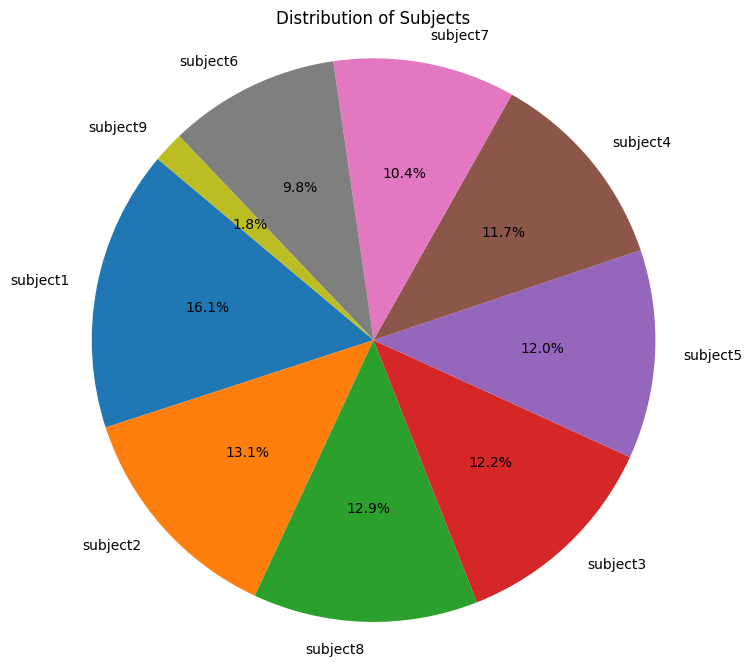

In [ ]:
# Define variable for subjects
subject_counts = df['subject'].value_counts()
# VIsualize subjects
plt.figure(figsize=(8, 8))
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Subjects')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()

In [ ]:
# List unique values for subjects
subject_unique_values = df['subject'].unique()
subject_frequencies = df['subject'].value_counts()

print("Unique Values in 'subject':")
print(subject_unique_values)

print("\nFrequencies of each unique value:")
print(subject_frequencies)

Unique Values in 'subject':
['subject1' 'subject2' 'subject3' 'subject4' 'subject5' 'subject6'
 'subject7' 'subject8' 'subject9']

Frequencies of each unique value:
subject
subject1    161280
subject2    130561
subject8    129024
subject3    122112
subject5    119808
subject4    116736
subject7    104448
subject6     98304
subject9     17726
Name: count, dtype: int64


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alx       999999 non-null  float64
 1   aly       999999 non-null  float64
 2   alz       999999 non-null  float64
 3   glx       999999 non-null  float64
 4   gly       999999 non-null  float64
 5   glz       999999 non-null  float64
 6   arx       999999 non-null  float64
 7   ary       999999 non-null  float64
 8   arz       999999 non-null  float64
 9   grx       999999 non-null  float64
 10  gry       999999 non-null  float64
 11  grz       999999 non-null  float64
 12  Activity  999999 non-null  int64  
 13  subject   999999 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 106.8+ MB


In [ ]:
df.describe()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
count,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.00000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000
mean,1.473954,-9.618162,-0.944714,-0.023928,-0.616830,-0.131466,-3.578801,-5.72591,2.645165,-0.293943,-0.450610,0.283440,1.702181
std,3.751845,4.076683,5.333969,0.495758,0.354135,0.547774,4.770602,5.70559,3.897641,0.528506,0.564118,0.558707,3.250841
min,-22.146000,-19.619000,-19.373000,-2.146600,-7.789900,-2.567800,-22.361000,-18.97200,-18.239000,-8.339200,-3.570800,-2.689700,0.000000
25%,0.115100,-10.116000,-2.662400,-0.454550,-0.816140,-0.561890,-5.984100,-9.36790,0.406120,-0.711760,-0.882960,-0.211210,0.000000
50%,1.336800,-9.644800,-0.016372,-0.070501,-0.703560,-0.137520,-2.859700,-7.35990,2.231200,-0.372550,-0.622180,0.325430,0.000000
75%,2.586900,-9.034300,1.371500,0.426720,-0.542210,0.345780,-1.021200,-2.45280,5.201200,0.049020,-0.080082,0.786640,2.000000
max,20.054000,21.161000,25.015000,60.484000,2.011300,2.770100,19.864000,22.19100,25.741000,3.319600,1.556500,2.750000,12.000000


In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64


Number of observations by activity:
 Activity
0     720946
1      27648
2      25406
3      24576
4      24576
9      24576
10     24576
11     24576
5      24576
7      23809
8      23501
6      22990
12      8243
Name: count, dtype: int64


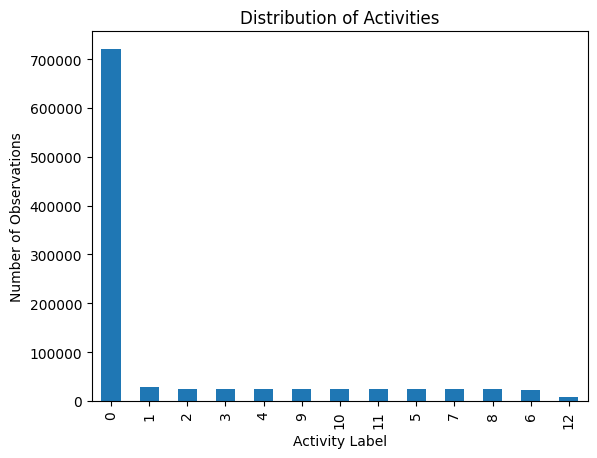

In [ ]:
activity_counts = df['Activity'].value_counts()
print("Number of observations by activity:\n", activity_counts)

# Optionally visualize as a bar chart
activity_counts.plot(kind='bar')
plt.title('Distribution of Activities')
plt.xlabel('Activity Label')
plt.ylabel('Number of Observations')
plt.show()

Activity 0: 'Doing Nothing' is highly over-represented in the target label

## Analyzing feature correllation

Correlation matrix:
           alx       aly       alz       glx       gly       glz       arx  \
alx  1.000000  0.009633 -0.074041  0.064957  0.070294 -0.043428 -0.044603   
aly  0.009633  1.000000  0.087648  0.040259  0.355508  0.049329  0.054208   
alz -0.074041  0.087648  1.000000  0.023140  0.163166  0.159942 -0.119042   
glx  0.064957  0.040259  0.023140  1.000000  0.136753  0.107542  0.024959   
gly  0.070294  0.355508  0.163166  0.136753  1.000000 -0.000090 -0.075696   
glz -0.043428  0.049329  0.159942  0.107542 -0.000090  1.000000  0.057016   
arx -0.044603  0.054208 -0.119042  0.024959 -0.075696  0.057016  1.000000   
ary  0.057801  0.093615  0.180918 -0.009940  0.132232  0.034590 -0.174855   
arz -0.002043  0.092219  0.074488  0.060752  0.093853  0.029826  0.091236   
grx -0.015235  0.044069  0.044972  0.384220  0.120945 -0.115416  0.389477   
gry  0.049395  0.155814  0.083747  0.029081  0.192501  0.405349 -0.230840   
grz  0.009469  0.094791 -0.021817  0.574623  0.120861  

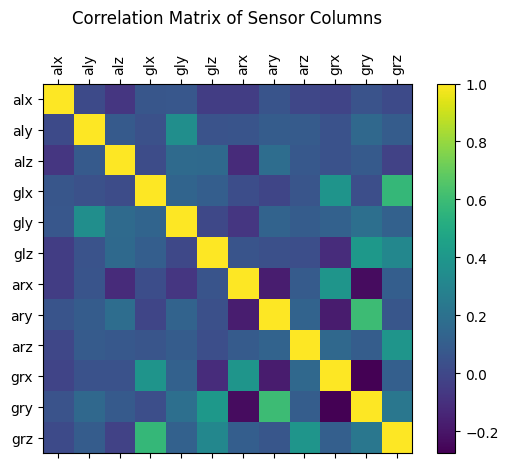

In [ ]:
sensor_columns = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz',
                  'arx', 'ary', 'arz', 'grx', 'gry', 'grz']

corr_matrix = df[sensor_columns].corr()
print("Correlation matrix:\n", corr_matrix)

# Quick heatmap using matplotlib (requires a bit of formatting)
fig, ax = plt.subplots()
cax = ax.matshow(corr_matrix, interpolation='nearest')
fig.colorbar(cax)
ax.set_xticks(range(len(sensor_columns)))
ax.set_yticks(range(len(sensor_columns)))
ax.set_xticklabels(sensor_columns, rotation=90)
ax.set_yticklabels(sensor_columns)
plt.title('Correlation Matrix of Sensor Columns', pad=20)
plt.show()

In [ ]:
# Group by subject and activity, then count the observations (rows)
grouped_counts = df.groupby(['subject', 'Activity']).size()

# Convert the grouped Series into a pivoted DataFrame
activity_breakdown = grouped_counts.unstack(level='Activity', fill_value=0)

# Check the resulting table
print(activity_breakdown)

Activity      0     1     2     3     4     5     6     7     8     9     10  \
subject                                                                        
subject1  126106  3072  3072  3072  3072  3072  3072  3072  3379  3072  3072   
subject2   95029  3072  3072  3072  3072  3072  3174  3328  3430  3072  3072   
subject3   86732  3072  3072  3072  3072  3072  3226  3379  3175  3072  3072   
subject4   81408  3072  3072  3072  3072  3072  3328  3277  3123  3072  3072   
subject5   85861  3072  3072  3072  3072  3072  2765  2868  2714  3072  3072   
subject6   66099  3072  3072  3072  3072  3072  2202  2099  2304  3072  3072   
subject7   70195  3072  3072  3072  3072  3072  3072  2765  2816  3072  3072   
subject8   95692  3072  3072  3072  3072  3072  2151  3021  2560  3072  3072   
subject9   13824  3072   830     0     0     0     0     0     0     0     0   

Activity    11    12  
subject               
subject1  3072  1075  
subject2  3072  1024  
subject3  3072  1024  
subj

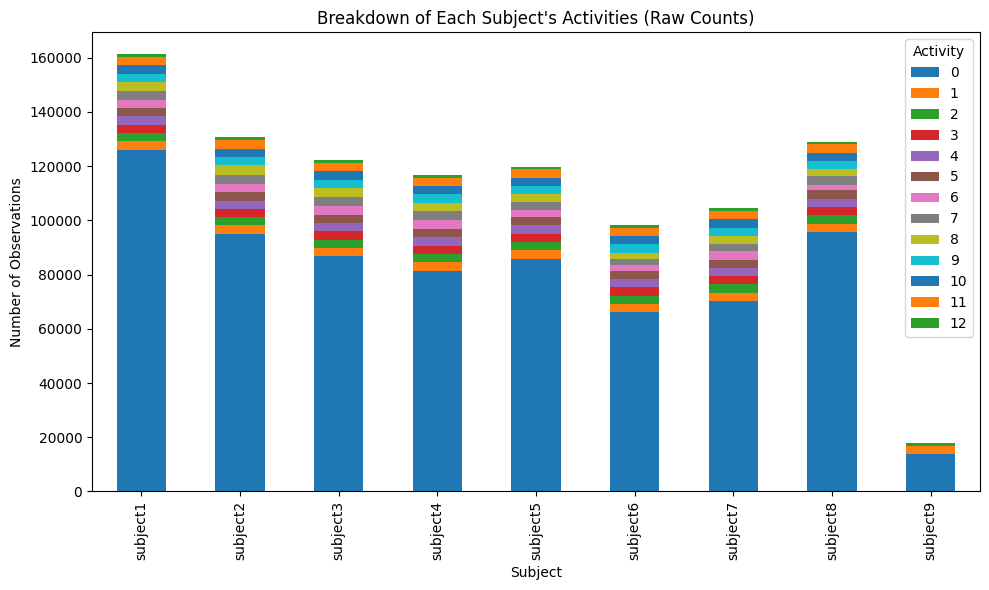

In [ ]:
# Create a stacked bar chart of activity counts
activity_breakdown.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Breakdown of Each Subject's Activities (Raw Counts)")
plt.xlabel('Subject')
plt.ylabel('Number of Observations')
plt.tight_layout()
plt.show()

## Due to subject 1 through 8 having similiar representation and subject 9 having significant missingness, the decision is made to drop subject 9's observations.

In [ ]:
# Filter out rows where 'subject' is 'subject9'
df = df[df['subject'] != 'subject9']

print("New shape after removing subject9:", df.shape)

New shape after removing subject9: (982273, 14)


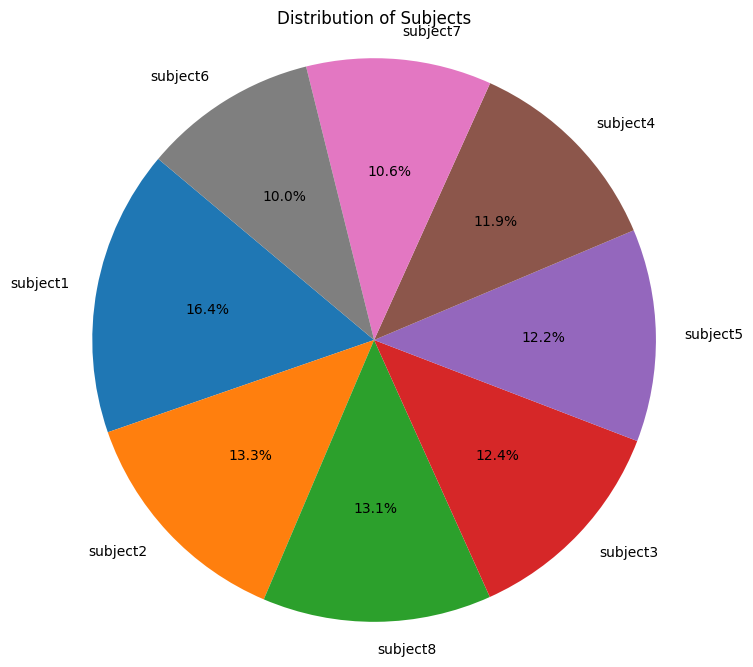

In [ ]:
# Define variable for subjects
subject_counts = df['subject'].value_counts()
# VIsualize subjects
plt.figure(figsize=(8, 8))
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Subjects')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()

Much more balanced data across each subject

##Determining how similar the distributions of sensor data are for each activity to determine how to merge activities into fewer, more manageable classes

In [ ]:
sensor_cols = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz',
               'arx', 'ary', 'arz', 'grx', 'gry', 'grz']
# The following line ensures no columns get truncated:
pd.set_option('display.max_columns', None)
summary_stats = df.groupby('Activity')[sensor_cols].describe()
print(summary_stats)

               alx                                                    \
             count      mean       std       min       25%       50%   
Activity                                                               
0         707122.0  1.358217  3.618490 -22.10500  0.071482  1.336800   
1          24576.0  0.957819  1.040709  -1.80640  0.290220  1.125400   
2          24576.0  2.016534  1.216013  -0.47555  0.924863  2.520050   
3          24576.0  3.447880  2.251909  -0.64065  1.754400  3.798200   
4          24576.0  2.079066  3.888656 -21.74700  0.568890  1.954550   
5          24576.0  1.656781  2.837255 -21.54300  0.428588  1.651550   
6          22990.0  0.158207  1.244601  -6.47070 -0.847195 -0.056485   
7          23809.0  1.068981  0.946956  -0.56228  0.158200  1.020100   
8          23501.0  1.483021  1.332674  -6.04720  0.571890  1.380800   
9          24576.0  0.905696  1.606217 -11.31000 -0.102050  0.851445   
10         24576.0  2.666188  6.290462 -22.12300 -0.190785  2.71

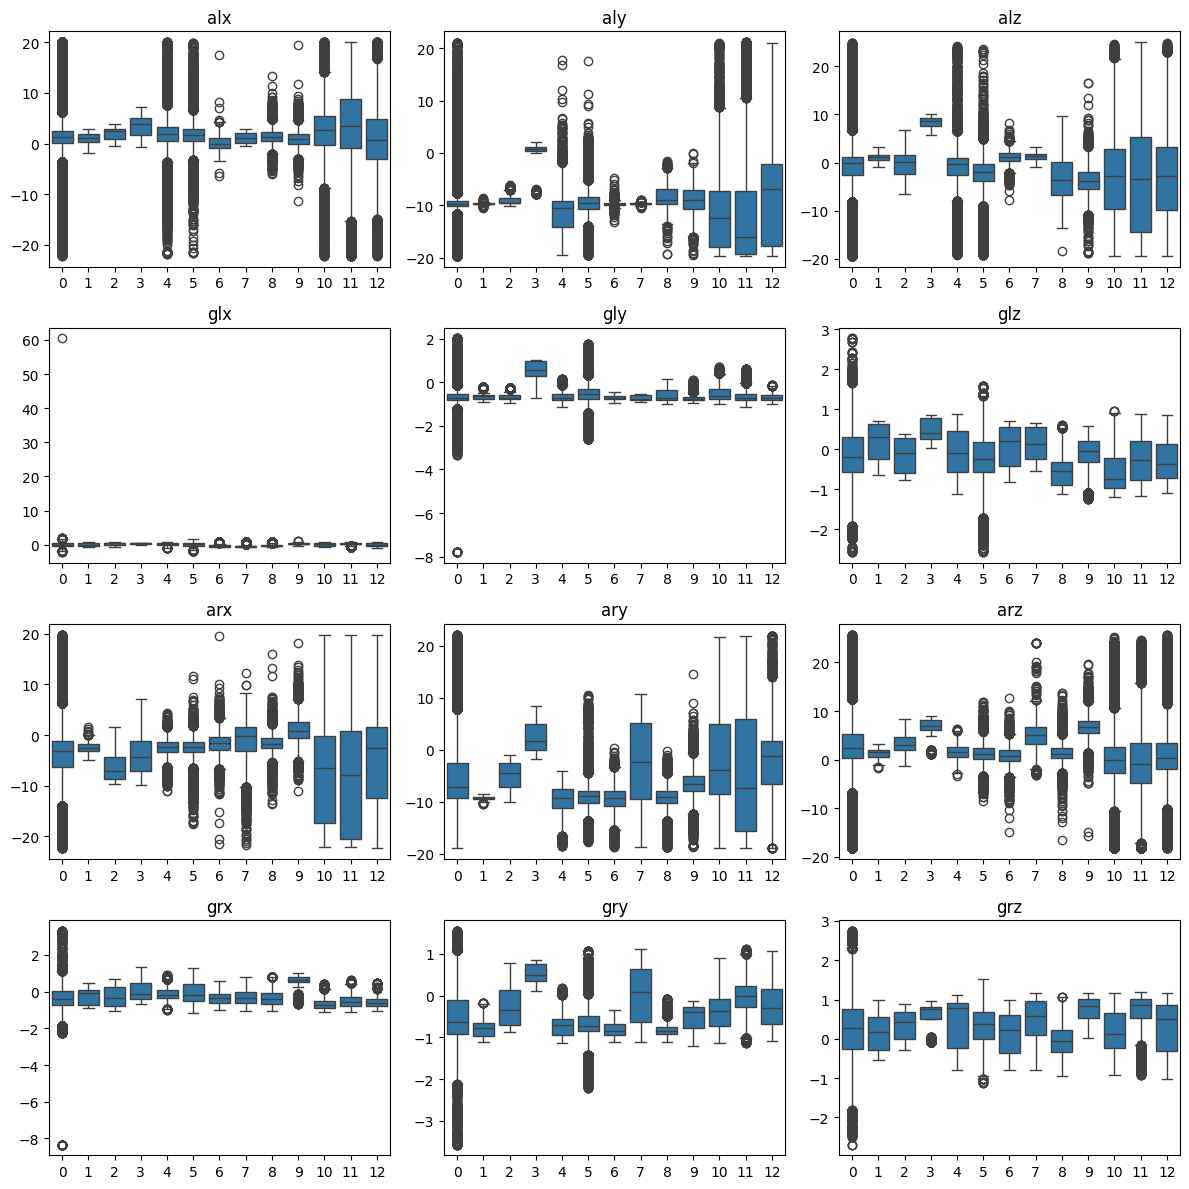

In [ ]:
import seaborn as sns  # if you prefer violin plots, note: but you can do boxplots with matplotlib as well

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))  # 12 sensor columns, e.g., 4x3 layout
axes = axes.flatten()

for i, col in enumerate(sensor_cols):
    sns.boxplot(x='Activity', y=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.630770,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.683890,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.681130,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.550310,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.710980,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982268,2.4278,-9.5092,-1.419900,-0.087199,-0.61351,-0.91356,-6.5514,5.1998,-2.021300,-0.68431,-0.10678,-0.732760,0,subject8
982269,2.8406,-9.4646,-0.913570,-0.087199,-0.61351,-0.91356,-6.6629,5.5525,-2.753600,-0.68431,-0.10678,-0.732760,0,subject8
982270,3.4740,-10.7230,-0.053508,-0.087199,-0.61351,-0.91356,-7.3405,6.0766,-2.342000,-0.68431,-0.10678,-0.732760,0,subject8
982271,2.1789,-11.5930,-0.849510,-0.087199,-0.61351,-0.91356,-8.1415,6.5154,-2.455500,-0.66667,-0.11499,-0.758620,0,subject8


In [ ]:
# Check activity counts
print(df['Activity'].value_counts())

Activity
0     707122
1      24576
2      24576
3      24576
4      24576
9      24576
10     24576
11     24576
5      24576
7      23809
8      23501
6      22990
12      8243
Name: count, dtype: int64


## Visualizing the movement of each subject sequentially

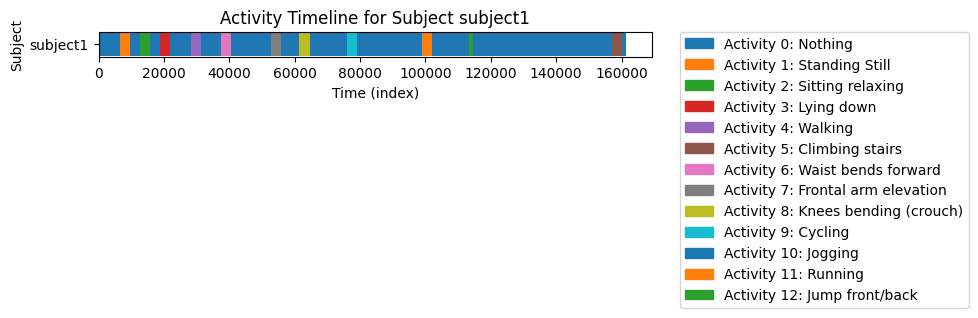

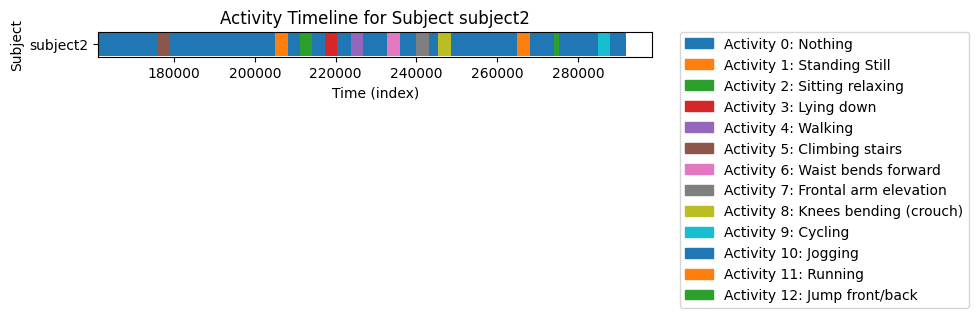

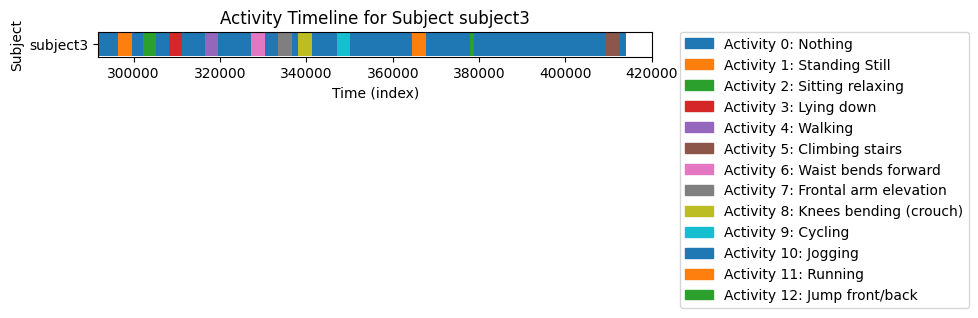

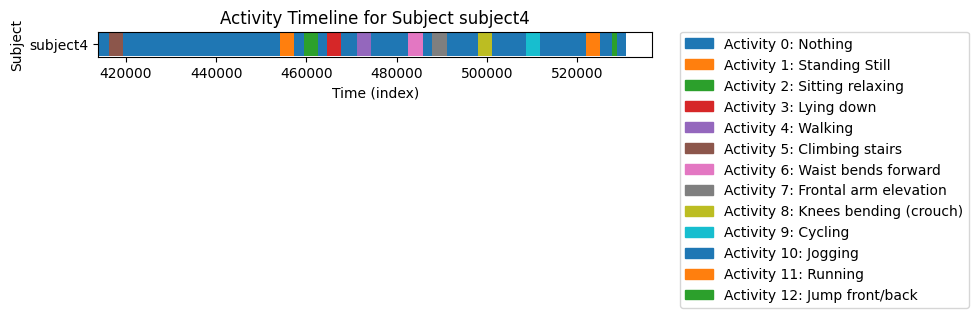

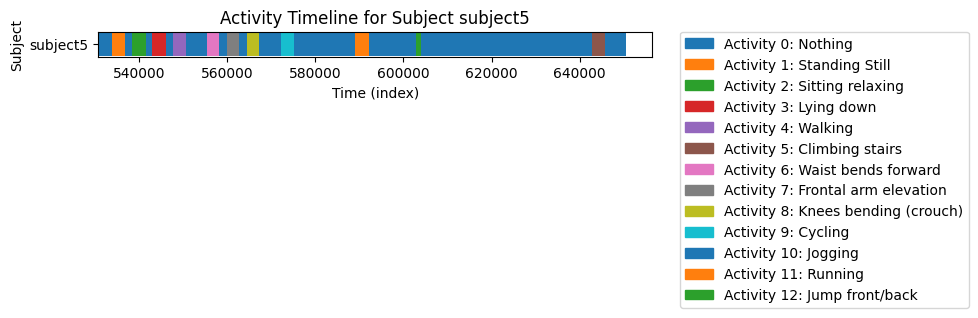

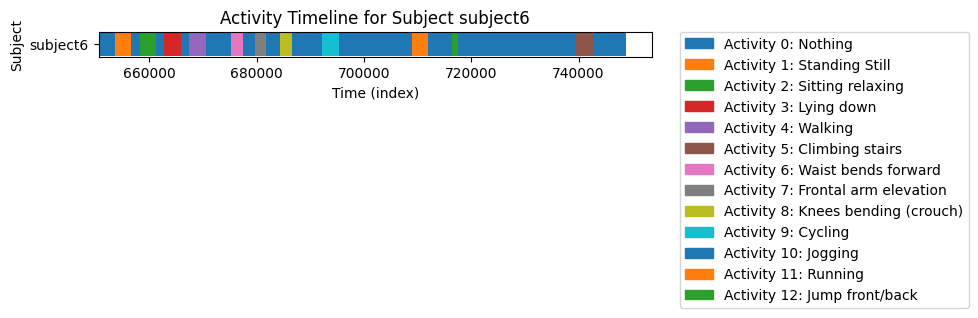

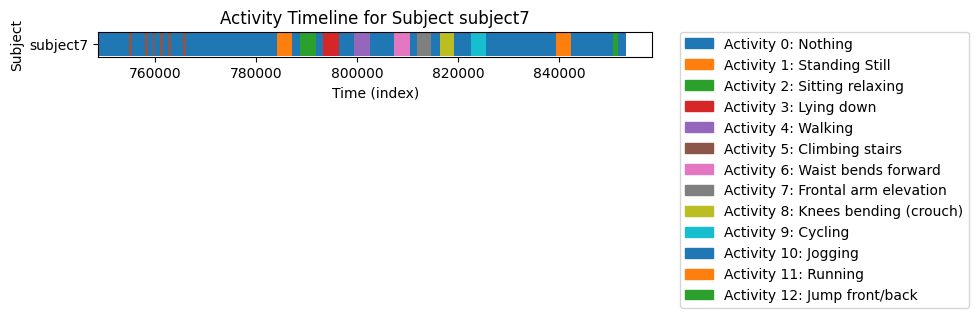

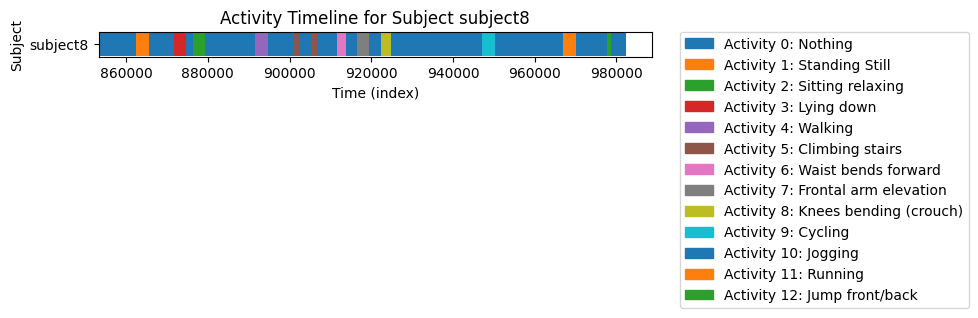

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Example color map for 13 activities (0 through 12).
# You can customize these colors as you prefer.
# Note: 'C0'–'C9' are the default 10 matplotlib cycle colors;
# for beyond 10, you can use other named colors or hex codes.
color_map = {
    0: 'C0',
    1: 'C1',
    2: 'C2',
    3: 'C3',
    4: 'C4',
    5: 'C5',
    6: 'C6',
    7: 'C7',
    8: 'C8',
    9: 'C9',
    10: 'tab:blue',    # or use a unique hex color, e.g. '#1f77b4'
    11: 'tab:orange',  # or another color, e.g. '#ff7f0e'
    12: 'tab:green'    # or another color, e.g. '#2ca02c'
}

# Labels for legend
activity_labels = {
    0: 'Activity 0: Nothing',
    1: 'Activity 1: Standing Still',
    2: 'Activity 2: Sitting relaxing',
    3: 'Activity 3: Lying down',
    4: 'Activity 4: Walking',
    5: 'Activity 5: Climbing stairs',
    6: 'Activity 6: Waist bends forward',
    7: 'Activity 7: Frontal arm elevation',
    8: 'Activity 8: Knees bending (crouch)',
    9: 'Activity 9: Cycling',
    10: 'Activity 10: Jogging',
    11: 'Activity 11: Running',
    12: 'Activity 12: Jump front/back'
}

# Create legend patches for all activities
legend_patches = [
    mpatches.Patch(
        color=color_map[i],
        label=activity_labels[i]
    ) for i in sorted(activity_labels.keys())
]

# Collect all unique subjects (assuming your DataFrame is named df)
subjects = df['subject'].unique()

for subj in subjects:
    # Filter data for this subject and sort by index
    subdf = df[df['subject'] == subj].copy()
    subdf.sort_index(inplace=True)

    # Create a new figure for this subject
    fig, ax = plt.subplots(figsize=(10, 2))

    idx_array = subdf.index.to_list()
    activity_array = subdf['Activity'].to_list()

    start_idx = None
    current_activity = None

    # Build contiguous segments of each Activity
    for j in range(len(subdf)):
        idx = idx_array[j]
        act = activity_array[j]

        if j == 0:
            # Initialize the start of the first segment
            start_idx = idx
            current_activity = act
        else:
            # If the activity changes, draw a bar for the previous segment
            if act != current_activity:
                end_idx = idx_array[j - 1]
                width = end_idx - start_idx + 1  # inclusive
                ax.barh(
                    y=0,
                    width=width,
                    left=start_idx,
                    color=color_map.get(current_activity, 'gray'),
                    edgecolor='none'
                )
                # Reset for the next segment
                start_idx = idx
                current_activity = act

    # Close out the final segment after the loop
    if start_idx is not None:
        end_idx = idx_array[-1]
        width = end_idx - start_idx + 1
        ax.barh(
            y=0,
            width=width,
            left=start_idx,
            color=color_map.get(current_activity, 'gray'),
            edgecolor='none'
        )

    # Place the legend to the right of the chart
    ax.legend(
        handles=legend_patches,
        loc='upper left',
        bbox_to_anchor=(1.05, 1),
        borderaxespad=0.
    )

    # Labeling
    ax.set_yticks([0])
    ax.set_yticklabels([subj])
    ax.set_xlabel("Time (index)")
    ax.set_ylabel("Subject")
    ax.set_title(f"Activity Timeline for Subject {subj}")

    plt.tight_layout()
    plt.show()


# Splitting Data into Train & Test sets

In [ ]:
from sklearn.model_selection import train_test_split

# Grouping by 'subject' and creating a list of dataframes, one per group
grouped = df.groupby('subject')
grouped_dfs = [group for _, group in grouped]

# Splitting the groups into training and test sets with an 80:20 ratio
train_groups, test_groups = train_test_split(grouped_dfs, test_size=0.2, random_state=42)

# Reassembling the training and test datasets from the groups
train_df = pd.concat(train_groups)
test_df = pd.concat(test_groups)

# Displaying the shape of the training and test sets
train_df_shape = train_df.shape
test_df_shape = test_df.shape

train_df_shape, test_df_shape

((753408, 14), (228865, 14))

## Normalizing continuous variables

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identifying numerical columns (excluding 'patient_nbr' and 'readmitted')
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('Activity')

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both training and test data
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# Checking the first few rows of the normalized training data
train_df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,0.214821,-0.022355,0.309939,0.244241,-0.668159,-1.036175,-1.098917,0.233330,-0.594683,-0.335191,-1.016340,-0.471094,0,subject1
1,0.267516,0.023418,0.319902,0.207517,-0.662733,-1.028975,-1.094306,0.278958,-0.636633,-0.335191,-1.016340,-0.471094,0,subject1
2,0.272975,0.009010,0.319384,0.207517,-0.662733,-1.028975,-1.069191,0.286484,-0.572206,-0.335191,-1.016340,-0.471094,0,subject1
3,0.213911,0.042315,0.294847,0.207517,-0.662733,-1.028975,-1.094388,0.279577,-0.548748,-0.349689,-1.012564,-0.486675,0,subject1
4,0.275237,0.052309,0.324983,0.207517,-0.662733,-1.028975,-1.109395,0.309677,-0.538585,-0.349689,-1.012564,-0.486675,0,subject1


In [ ]:
train_df.shape

(753408, 14)

# Addressing Class Imbalance

Class distribution (counts):
Activity
0     545994
1      18432
2      18432
3      18432
4      18432
9      18432
10     18432
11     18432
5      18432
7      18382
8      17767
6      17614
12      6195
Name: count, dtype: int64

Class distribution (percent):
Activity
0     72.469897
1      2.446483
2      2.446483
3      2.446483
4      2.446483
9      2.446483
10     2.446483
11     2.446483
5      2.446483
7      2.439847
8      2.358218
6      2.337910
12     0.822264
Name: count, dtype: float64


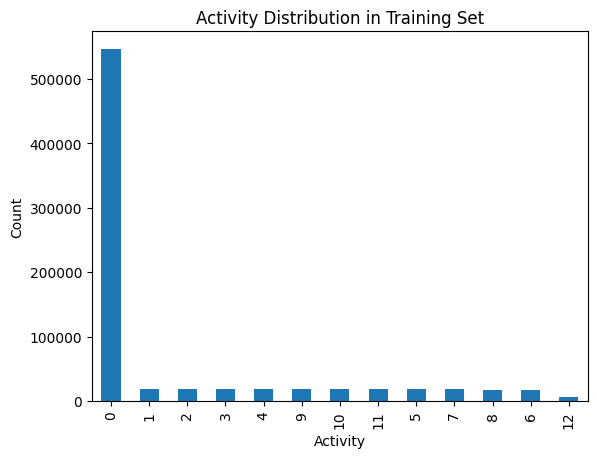

In [ ]:
# 1. Count observations per activity class
activity_counts = train_df['Activity'].value_counts()
print("Class distribution (counts):")
print(activity_counts)

# 2. Convert counts to proportions (optional)
activity_proportions = activity_counts / len(train_df) * 100
print("\nClass distribution (percent):")
print(activity_proportions)

# 3. (Optional) Visualize as a bar chart
activity_counts.plot(kind='bar')
plt.title('Activity Distribution in Training Set')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()

# Undersampling Majority Class (Activity 0) and Oversampling smallest class (Activity 12) to balance class distribution

In [ ]:
""" import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# 1) Separate features (X) and target (y)
X = train_df.drop(columns=['Activity'])
y = train_df['Activity']

print("Original class distribution:")
print(sorted(Counter(y).items()))

# -----------------------------
# 2) UNDERSAMPLE ACTIVITY 0
# -----------------------------
#   Only reduce the majority class (0) to 18,432
rus = RandomUnderSampler(
    sampling_strategy={0: 18432},  # dictionary specifying new count for class 0
    random_state=42
)

X_rus, y_rus = rus.fit_resample(X, y)

print("\nClass distribution after undersampling activity 0:")
print(sorted(Counter(y_rus).items()))

# -----------------------------------------
# 3) OVERSAMPLE ACTIVITY 12 UP TO 18,432
# -----------------------------------------
#   Only increase the minority class (12) to 18,432
ros = RandomOverSampler(
    sampling_strategy={12: 18432},  # dictionary specifying new count for class 12
    random_state=42
)

X_res, y_res = ros.fit_resample(X_rus, y_rus)

print("\nFinal class distribution after upsampling activity 12:")
print(sorted(Counter(y_res).items()))

# ---------------------------------------------------
# 4) Reconstruct a balanced train DataFrame
# ---------------------------------------------------
train_df_balanced = pd.concat([
    pd.DataFrame(X_res, columns=X.columns),
    pd.Series(y_res, name='Activity')
], axis=1)

print("\ntrain_df_balanced.shape:", train_df_balanced.shape) """


' import pandas as pd\nfrom imblearn.under_sampling import RandomUnderSampler\nfrom imblearn.over_sampling import RandomOverSampler\nfrom collections import Counter\n\n# 1) Separate features (X) and target (y)\nX = train_df.drop(columns=[\'Activity\'])\ny = train_df[\'Activity\']\n\nprint("Original class distribution:")\nprint(sorted(Counter(y).items()))\n\n# -----------------------------\n# 2) UNDERSAMPLE ACTIVITY 0\n# -----------------------------\n#   Only reduce the majority class (0) to 18,432\nrus = RandomUnderSampler(\n    sampling_strategy={0: 18432},  # dictionary specifying new count for class 0\n    random_state=42\n)\n\nX_rus, y_rus = rus.fit_resample(X, y)\n\nprint("\nClass distribution after undersampling activity 0:")\nprint(sorted(Counter(y_rus).items()))\n\n# -----------------------------------------\n# 3) OVERSAMPLE ACTIVITY 12 UP TO 18,432\n# -----------------------------------------\n#   Only increase the minority class (12) to 18,432\nros = RandomOverSampler(\n    

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# ----------------------------------------------------------------------
# (1) Create a group-level DataFrame: one row per (subject, activity).
# ----------------------------------------------------------------------
# We'll call this "group_df".
group_data = []
for (subj, act), grp in train_df.groupby(['subject', 'Activity']):
    group_data.append({
        'subject': subj,
        'Activity': act,
        'num_records': len(grp)  # or any other summary statistic
    })

group_df = pd.DataFrame(group_data)

# Suppose "activity" is our classification label at the group level.
# So group_df['activity'] becomes the "y" for sampling.

print("Original group distribution (by activity):")
print(Counter(group_df['Activity']))

# ------------------------------------------------------------
# (2) UNDERsample or OVERsample at the group level
# ------------------------------------------------------------
# Example scenario:
#   - Undersample the majority activity (e.g. activity 0)
#     to a certain # of groups
#   - Oversample a minority activity (e.g. activity 12)
#     to the same # of groups
#
# For demonstration, let's set them each to 6 groups
undersample_dict = {0: 6}   # reduce activity 0 to 6 groups
oversample_dict   = {12: 6} # increase activity 12 to 6 groups

# Step A: Undersample
rus = RandomUnderSampler(sampling_strategy=undersample_dict, random_state=42)
X_rus, y_rus = rus.fit_resample(group_df[['subject', 'num_records']], group_df['Activity'])

# Rebuild a partial group_df
under_group_df = pd.DataFrame(X_rus, columns=['subject', 'num_records'])
under_group_df['Activity'] = y_rus

print("\nDistribution after undersampling activity 0:")
print(Counter(under_group_df['Activity']))

# Step B: Oversample
ros = RandomOverSampler(sampling_strategy=oversample_dict, random_state=42)
X_res, y_res = ros.fit_resample(under_group_df[['subject', 'num_records']], under_group_df['Activity'])

final_group_df = pd.DataFrame(X_res, columns=['subject', 'num_records'])
final_group_df['Activity'] = y_res

print("\nDistribution after oversampling activity 12:")
print(Counter(final_group_df['Activity']))

# --------------------------------------------------
# (3) Reconstruct the final dataset from final_group_df
# --------------------------------------------------
# final_group_df may have repeated (subject, activity) combos if the oversampler
# decided to replicate them. So we must handle that carefully.

# Option 1: If each (subject, activity) is only supposed to appear once
#           even after oversampling:
final_groups = final_group_df[['subject', 'Activity']].drop_duplicates()

# Filter train_df to keep only those (subject, activity) combos
train_df_balanced = train_df.merge(final_groups, on=['subject', 'Activity'], how='inner')

print("\nFinal balanced train_df shape:", train_df_balanced.shape)

Original group distribution (by activity):
Counter({0: 6, 1: 6, 2: 6, 3: 6, 4: 6, 5: 6, 6: 6, 7: 6, 8: 6, 9: 6, 10: 6, 11: 6, 12: 6})

Distribution after undersampling activity 0:
Counter({0: 6, 1: 6, 2: 6, 3: 6, 4: 6, 5: 6, 6: 6, 7: 6, 8: 6, 9: 6, 10: 6, 11: 6, 12: 6})

Distribution after oversampling activity 12:
Counter({0: 6, 1: 6, 2: 6, 3: 6, 4: 6, 5: 6, 6: 6, 7: 6, 8: 6, 9: 6, 10: 6, 11: 6, 12: 6})

Final balanced train_df shape: (753408, 14)


## Create training and testing sequences based upon 30 second chunks of activity

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1) Define your columns
sensor_cols = [
    'alx', 'aly', 'alz',
    'glx', 'gly', 'glz',
    'arx', 'ary', 'arz',
    'grx', 'gry', 'grz'
]
target_col = 'Activity'
subject_col = 'subject'

# Each 30-second chunk = 30 * 50 Hz = 1500 timesteps
CHUNK_SIZE = 30 * 50  # 1500

def build_30s_sequences(df, sensor_columns, activity_column, chunk_size=1500, pad=True):
    """
    Splits each (subject, Activity) block into 30-second chunks of sensor data.
    Each chunk is assigned a single activity label.
    If 'pad' is True, partial chunks < chunk_size are zero-padded.
    Otherwise, partial chunks are discarded.

    Returns:
      X_array: shape (num_sequences, chunk_size, num_sensors)
      y_array: shape (num_sequences,)
    """
    X_list = []
    y_list = []

    # Group by (subject, activity)
    for (subj, act), group in df.groupby([subject_col, activity_column]):
        # Sort by time or index to ensure chronological order
        group = group.sort_index()

        # Extract sensor data as a NumPy array of shape (T, num_sensors)
        sensor_data = group[sensor_columns].values

        # We'll step through this array in non-overlapping chunks of length chunk_size
        start = 0
        total_steps = len(sensor_data)

        while start < total_steps:
            end = start + chunk_size
            chunk = sensor_data[start:end]
            chunk_len = len(chunk)

            if chunk_len == chunk_size:
                # Perfect 30-second chunk
                X_list.append(chunk)
                y_list.append(act)
            else:
                # Partial chunk if we've reached the end
                if pad:
                    # Zero-pad this chunk to length chunk_size
                    # shape => (chunk_len, num_sensors)
                    pad_width = chunk_size - chunk_len
                    # Create a zero array of shape (pad_width, num_sensors)
                    pad_array = np.zeros((pad_width, len(sensor_columns)))
                    padded_chunk = np.vstack([chunk, pad_array])

                    X_list.append(padded_chunk)
                    y_list.append(act)
                # else: skip the partial chunk
            start += chunk_size

    # Convert to a list of lists so pad_sequences can handle them (if needed).
    # But since each chunk is already length chunk_size, we typically don't need extra padding.
    # We'll do it anyway in case there's any leftover variation.
    X_list_of_lists = [x.tolist() for x in X_list]

    # Use pad_sequences to ensure all sequences are shape (chunk_size, num_sensors).
    # This is effectively a no-op if everything is already chunk_size.
    X_padded = pad_sequences(
        X_list_of_lists,
        maxlen=chunk_size,
        dtype='float32',
        padding='post',
        truncating='post',
        value=0.0  # pad with zeros
    )

    # Convert to final NumPy arrays
    X_array = np.array(X_padded)  # shape: (num_sequences, chunk_size, num_sensors)
    y_array = np.array(y_list, dtype='int32')  # shape: (num_sequences,)

    print(f"Number of 30s sequences created: {len(X_array)}")
    print("X_array shape:", X_array.shape)
    print("y_array shape:", y_array.shape)

    return X_array, y_array


# -------------------------------------------------------------------
# 2) Build sequences for train_df_balanced
# -------------------------------------------------------------------
X_train, y_train = build_30s_sequences(
    df=train_df_balanced,
    sensor_columns=sensor_cols,
    activity_column=target_col,
    chunk_size=CHUNK_SIZE,
    pad=True  # or False if you want to discard partial sequences
)

# -------------------------------------------------------------------
# 3) Build sequences for test_df
# -------------------------------------------------------------------
X_test, y_test = build_30s_sequences(
    df=test_df,
    sensor_columns=sensor_cols,
    activity_column=target_col,
    chunk_size=CHUNK_SIZE,
    pad=True
)

# Now you have X_train, y_train, X_test, y_test with 30-second windows

Number of 30s sequences created: 564
X_array shape: (564, 1500, 12)
y_array shape: (564,)
Number of 30s sequences created: 174
X_array shape: (174, 1500, 12)
y_array shape: (174,)


# Train RNN - Original (hidden changed from 256 to 36, epochs changed from 30 to 15)

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

########################################
# 1) Data Preparation
########################################

# Suppose you have prepared these NumPy arrays from your sequence-generation step:
#   X_train_padded.shape = (num_train_sequences, 1500, 12)
#   y_train.shape         = (num_train_sequences,)
#   X_test_padded.shape  = (num_test_sequences, 1500, 12)
#   y_test.shape          = (num_test_sequences,)

# Convert NumPy arrays to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.long)
X_test_torch  = torch.tensor(X_test, dtype=torch.float32)
y_test_torch  = torch.tensor(y_test, dtype=torch.long)

# Build TensorDatasets and DataLoaders
batch_size = 512
train_dataset = TensorDataset(X_train_torch, y_train_torch)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_torch, y_test_torch)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

########################################
# 2) Model Definition
########################################

# Hyperparameters
input_size = 12      # 12 sensor columns
hidden_size = 256    # number of hidden units in RNN
num_classes = 13     # activities 0..12
epochs = 15
learning_rate = 0.0001
landa = 0.000001  # L2 regularization coefficient (if used)

# RNN layer (you could also use nn.LSTM or nn.GRU)
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # dropout between RNN layers (optional)

# Optionally define a second RNN layer:
# rnn_layer2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)

# Fully-connected layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)
fc_layer2 = nn.Linear(hidden_size // 2, num_classes)

# Dropout layer between fully connected layers
dropout_fc = nn.Dropout(0.2)

# Activation function
relu = nn.ReLU()

# Loss function
loss_fn = nn.CrossEntropyLoss()

# We’ll create the optimizer inside the training loop
# to handle learning rate scheduling.

########################################
# 3) Training Loop
########################################

all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Put modules in training mode initially
rnn_layer1.train()
# rnn_layer2.train()
fc_layer1.train()
fc_layer2.train()

for epoch in range(epochs):
    # Decay learning rate every 10 epochs (example schedule)
    if epoch % 10 == 0 and epoch > 0:
        learning_rate *= 0.9

    # Define optimizer on each epoch to apply the new learning rate
    optimizer = Adam(
        list(rnn_layer1.parameters()) +
        # list(rnn_layer2.parameters()) +
        list(fc_layer1.parameters()) +
        list(fc_layer2.parameters()),
        lr=learning_rate
    )

    per_epoch_loss_list = []

    # -------------------------
    # Training (mini-batch)
    # -------------------------
    for X_batch, Y_batch in train_loader:
        # Forward pass
        out, _ = rnn_layer1(X_batch)
        out = dropout1(out)          # apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)

        # Take the last timestep output
        out = out[:, -1, :]

        # Fully-connected layers
        out = relu(fc_layer1(out))
        out = dropout_fc(out)        # optional dropout
        out = fc_layer2(out)

        # Optionally apply L2 regularization:
        # l2_term = sum((w**2).sum() for w in list(rnn_layer1.parameters()) +
        #               list(rnn_layer2.parameters()) +
        #               list(fc_layer1.parameters()) +
        #               list(fc_layer2.parameters()))
        # loss = loss_fn(out, Y_batch) + landa * l2_term

        loss = loss_fn(out, Y_batch)

        # Backward pass and update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        per_epoch_loss_list.append(loss.item())

    all_loss += per_epoch_loss_list

    # -------------------------
    # Evaluation (train & test)
    # -------------------------
    # Switch to eval mode
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    # Evaluate on training data
    train_correct, train_total = 0, 0
    with torch.no_grad():
        for X_batch, Y_batch in train_loader:
            out, _ = rnn_layer1(X_batch)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)

            _, predicted = torch.max(out.data, 1)
            train_total += Y_batch.size(0)
            train_correct += (predicted == Y_batch).sum().item()

    train_accuracy = 100.0 * train_correct / train_total

    # Evaluate on test data
    validation_correct, validation_total = 0, 0
    with torch.no_grad():
        for X_batch, Y_batch in test_loader:
            out, _ = rnn_layer1(X_batch)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)

            _, predicted = torch.max(out.data, 1)
            validation_total += Y_batch.size(0)
            validation_correct += (predicted == Y_batch).sum().item()

    validation_accuracy = 100.0 * validation_correct / validation_total

    # Print epoch progress
    print(f"Epoch {epoch+1}/{epochs} | "
          f"Train Acc: {train_accuracy:.2f}% | "
          f"Val Acc: {validation_accuracy:.2f}%")

    # Store metrics
    train_accuracy_list.append(train_accuracy)
    validation_accuracy_list.append(validation_accuracy)
    avg_epoch_loss = sum(per_epoch_loss_list) / len(per_epoch_loss_list)
    train_loss_list.append(avg_epoch_loss)

    # Switch back to train mode for next epoch
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

########################################
# 4) Final Model Evaluation
########################################

# You can do a final pass on the test_loader or other metrics as needed:
print("\nTraining complete.")
print(f"Final Training Accuracy:  {train_accuracy_list[-1]:.2f}%")
print(f"Final Validation Accuracy: {validation_accuracy_list[-1]:.2f}%")


Epoch 1/15 | Train Acc: 2.84% | Val Acc: 3.45%
Epoch 2/15 | Train Acc: 3.19% | Val Acc: 3.45%
Epoch 3/15 | Train Acc: 5.85% | Val Acc: 8.62%
Epoch 4/15 | Train Acc: 22.34% | Val Acc: 20.11%
Epoch 5/15 | Train Acc: 32.27% | Val Acc: 29.89%
Epoch 6/15 | Train Acc: 39.89% | Val Acc: 39.66%
Epoch 7/15 | Train Acc: 45.39% | Val Acc: 45.98%
Epoch 8/15 | Train Acc: 51.24% | Val Acc: 49.43%
Epoch 9/15 | Train Acc: 54.79% | Val Acc: 52.87%
Epoch 10/15 | Train Acc: 57.45% | Val Acc: 54.60%
Epoch 11/15 | Train Acc: 59.93% | Val Acc: 56.32%
Epoch 12/15 | Train Acc: 61.88% | Val Acc: 59.20%
Epoch 13/15 | Train Acc: 62.94% | Val Acc: 59.20%
Epoch 14/15 | Train Acc: 63.12% | Val Acc: 59.77%
Epoch 15/15 | Train Acc: 63.12% | Val Acc: 59.77%

Training complete.
Final Training Accuracy:  63.12%
Final Validation Accuracy: 59.77%


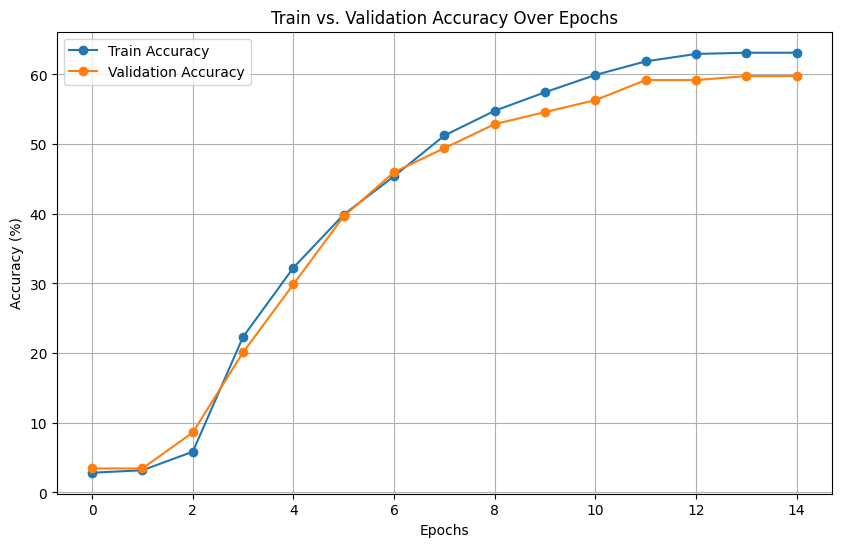

In [ ]:
# Create a new figure with a defined size
plt.figure(figsize=(10, 6))

# Plot training accuracy with markers
plt.plot(train_accuracy_list, label="Train Accuracy", marker='o')

# Plot validation accuracy with markers
plt.plot(validation_accuracy_list, label="Validation Accuracy", marker='o')

# Add labels and title
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Train vs. Validation Accuracy Over Epochs")

# Display the legend and grid, then show the plot
plt.legend()
plt.grid(True)
plt.show()

Confusion Matrix:
[[104   0   1   0   0   4   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   2   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.95      0.75       109
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         6
           3       0.00  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


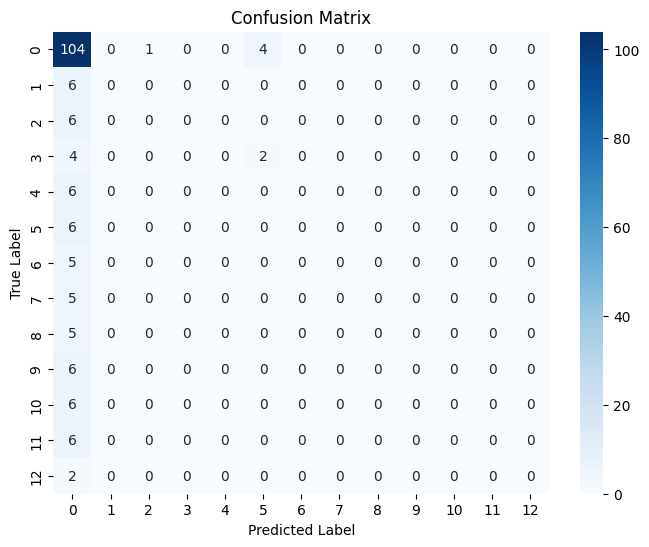

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Set the model to evaluation mode
rnn_layer1.eval()
# If using a second RNN layer, set it to eval as well:
# rnn_layer2.eval()
fc_layer1.eval()
fc_layer2.eval()

all_preds = []
all_labels = []

# Iterate over the test data
with torch.no_grad():
    for X_batch, Y_batch in test_loader:
        # Forward pass through the network
        out, _ = rnn_layer1(X_batch)
        # If using a second RNN layer, include it:
        # out, _ = rnn_layer2(out)
        out = out[:, -1, :]  # Take the last timestep output
        out = relu(fc_layer1(out))
        out = fc_layer2(out)

        # Get predicted labels (class with the highest probability)
        _, predicted = torch.max(out.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(Y_batch.cpu().numpy())

# Convert to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Compute the confusion matrix and classification report
cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(all_labels, all_preds))

# Compute overall accuracy
accuracy = accuracy_score(all_labels, all_preds)
print("Overall Accuracy: {:.2f}%".format(accuracy * 100))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Approach #2

###Using Sliding Window with Decision Tree

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import io
import numpy as np
import warnings

df = pd.read_csv('/content/drive/MyDrive/Intro to ML/Datathon #4 - mhealth Dataset - HAD7001.csv')
df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [ ]:
#Add a time interval for a sliding window
df['time'] = df.groupby('subject').cumcount()*1

In [ ]:
#Create a factor variable for subject
df['subject'] = pd.factorize(df['subject'])[0]

In [ ]:
df['Activity'] = df['Activity'].apply(lambda x: 0 if x == 0 else
                                          1 if x <4 else
                                          2 if 4 <= x <= 8 else
                                          3 if x <=12 else na.n)

In [ ]:
def create_sliding_window(df, window_size=10, step_size=1):
    windows = []

    # Group by Subject
    grouped = df.groupby(['subject', 'Activity'])

    # Iterate over each group
    for (subject, activity), group in grouped:
        # Ensure data is sorted by time or index
        group = group.sort_values(by='time')

        # Loop over the data with sliding window
        for start in range(0, len(group) - window_size, step_size):
            end = start + window_size
            window_data = group.iloc[start:end]

            # Extract features (X) and target (y)
            X_window = window_data.drop(columns=['subject', 'Activity', 'time'])
            y_window = window_data['Activity'].iloc[-1]  # Or other labels for prediction

            # Append the window data
            windows.append((X_window.values, y_window))

    return windows

In [ ]:
windows = create_sliding_window(df, window_size=1000, step_size=100)

In [ ]:
X_windows = [window[0] for window in windows]
y_windows = [window[1] for window in windows]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_windows, y_windows, test_size=0.2, random_state=42)

In [ ]:
numerical_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])

model = Pipeline(steps = [
    ('pre_precess', numerical_transformer),
    ('model', DecisionTreeClassifier(random_state = 42, max_depth = 3))
])
X_train_reshaped = np.array([window.reshape(-1) for window in X_train])
X_test_reshaped = np.array([window.reshape(-1) for window in X_test])

In [ ]:
model.fit(X_train_reshaped, y_train)

Pipeline(steps=[('pre_precess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('model',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

In [ ]:
y_pred = model.predict([x.reshape(-1) for x in X_test])
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7644628099173554


[Text(0.5, 0.875, 'x[10530] <= -2.248\ngini = 0.433\nsamples = 7743\nvalue = [5701, 553, 905, 584]'),
 Text(0.25, 0.625, 'x[2905] <= -0.182\ngini = 0.384\nsamples = 222\nvalue = [56.0, 0.0, 1.0, 165.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5403] <= -1.238\ngini = 0.122\nsamples = 123\nvalue = [8, 0, 0, 115]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0, 0]'),
 Text(0.1875, 0.125, 'gini = 0.065\nsamples = 119\nvalue = [4, 0, 0, 115]'),
 Text(0.375, 0.375, 'x[2665] <= -0.199\ngini = 0.51\nsamples = 99\nvalue = [48, 0, 1, 50]'),
 Text(0.3125, 0.125, 'gini = 0.176\nsamples = 41\nvalue = [4, 0, 0, 37]'),
 Text(0.4375, 0.125, 'gini = 0.374\nsamples = 58\nvalue = [44, 0, 1, 13]'),
 Text(0.75, 0.625, 'x[11450] <= 1.315\ngini = 0.414\nsamples = 7521\nvalue = [5645, 553, 904, 419]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[10626] <= -2.317\ngini = 0.379\nsamples = 7019\nvalue = [5434, 327, 897, 361]'),
 Text(0.5625, 0.125, 'gini = 0.462\nsampl

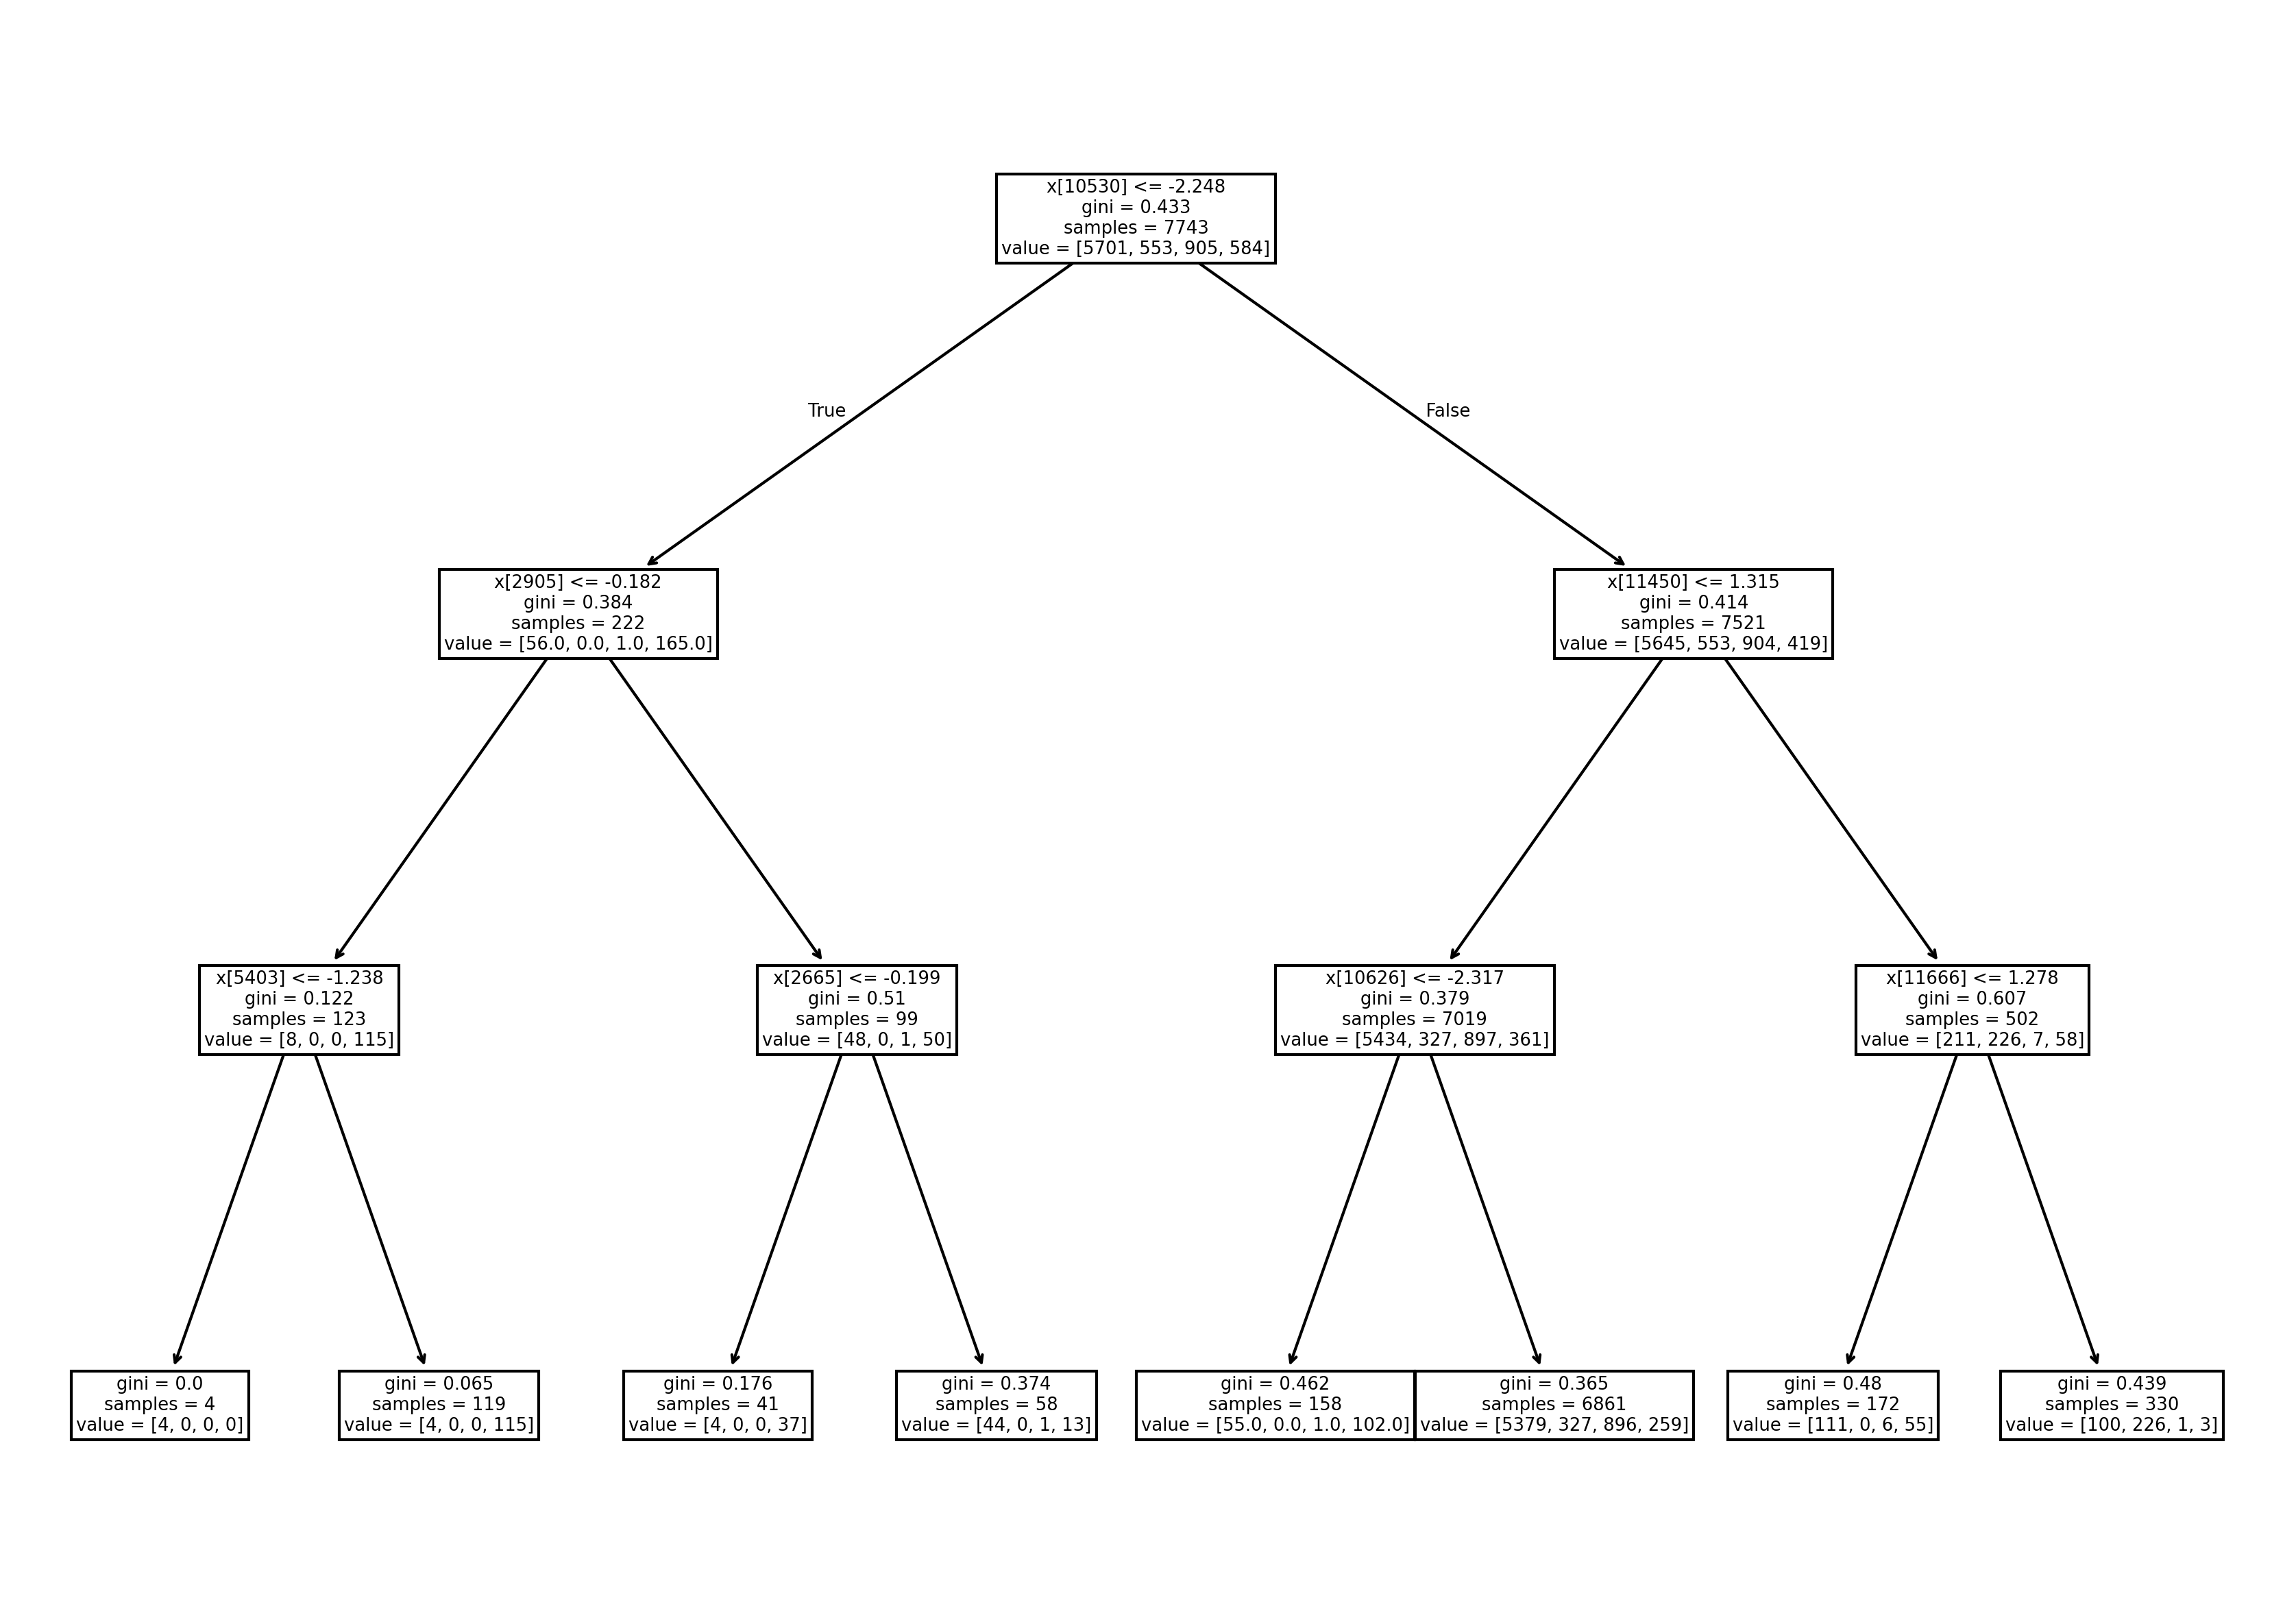

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.figsize'] = [14, 10] # 14 by 10 inch
mpl.rcParams['font.size'] = 15
tree.plot_tree(model.named_steps['model'])


===== Model Evaluation =====
Test Accuracy: 0.7644628099173554
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1423
           1       0.61      0.36      0.45       141
           2       0.00      0.00      0.00       212
           3       0.75      0.34      0.47       160

    accuracy                           0.76      1936
   macro avg       0.53      0.42      0.44      1936
weighted avg       0.67      0.76      0.70      1936



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


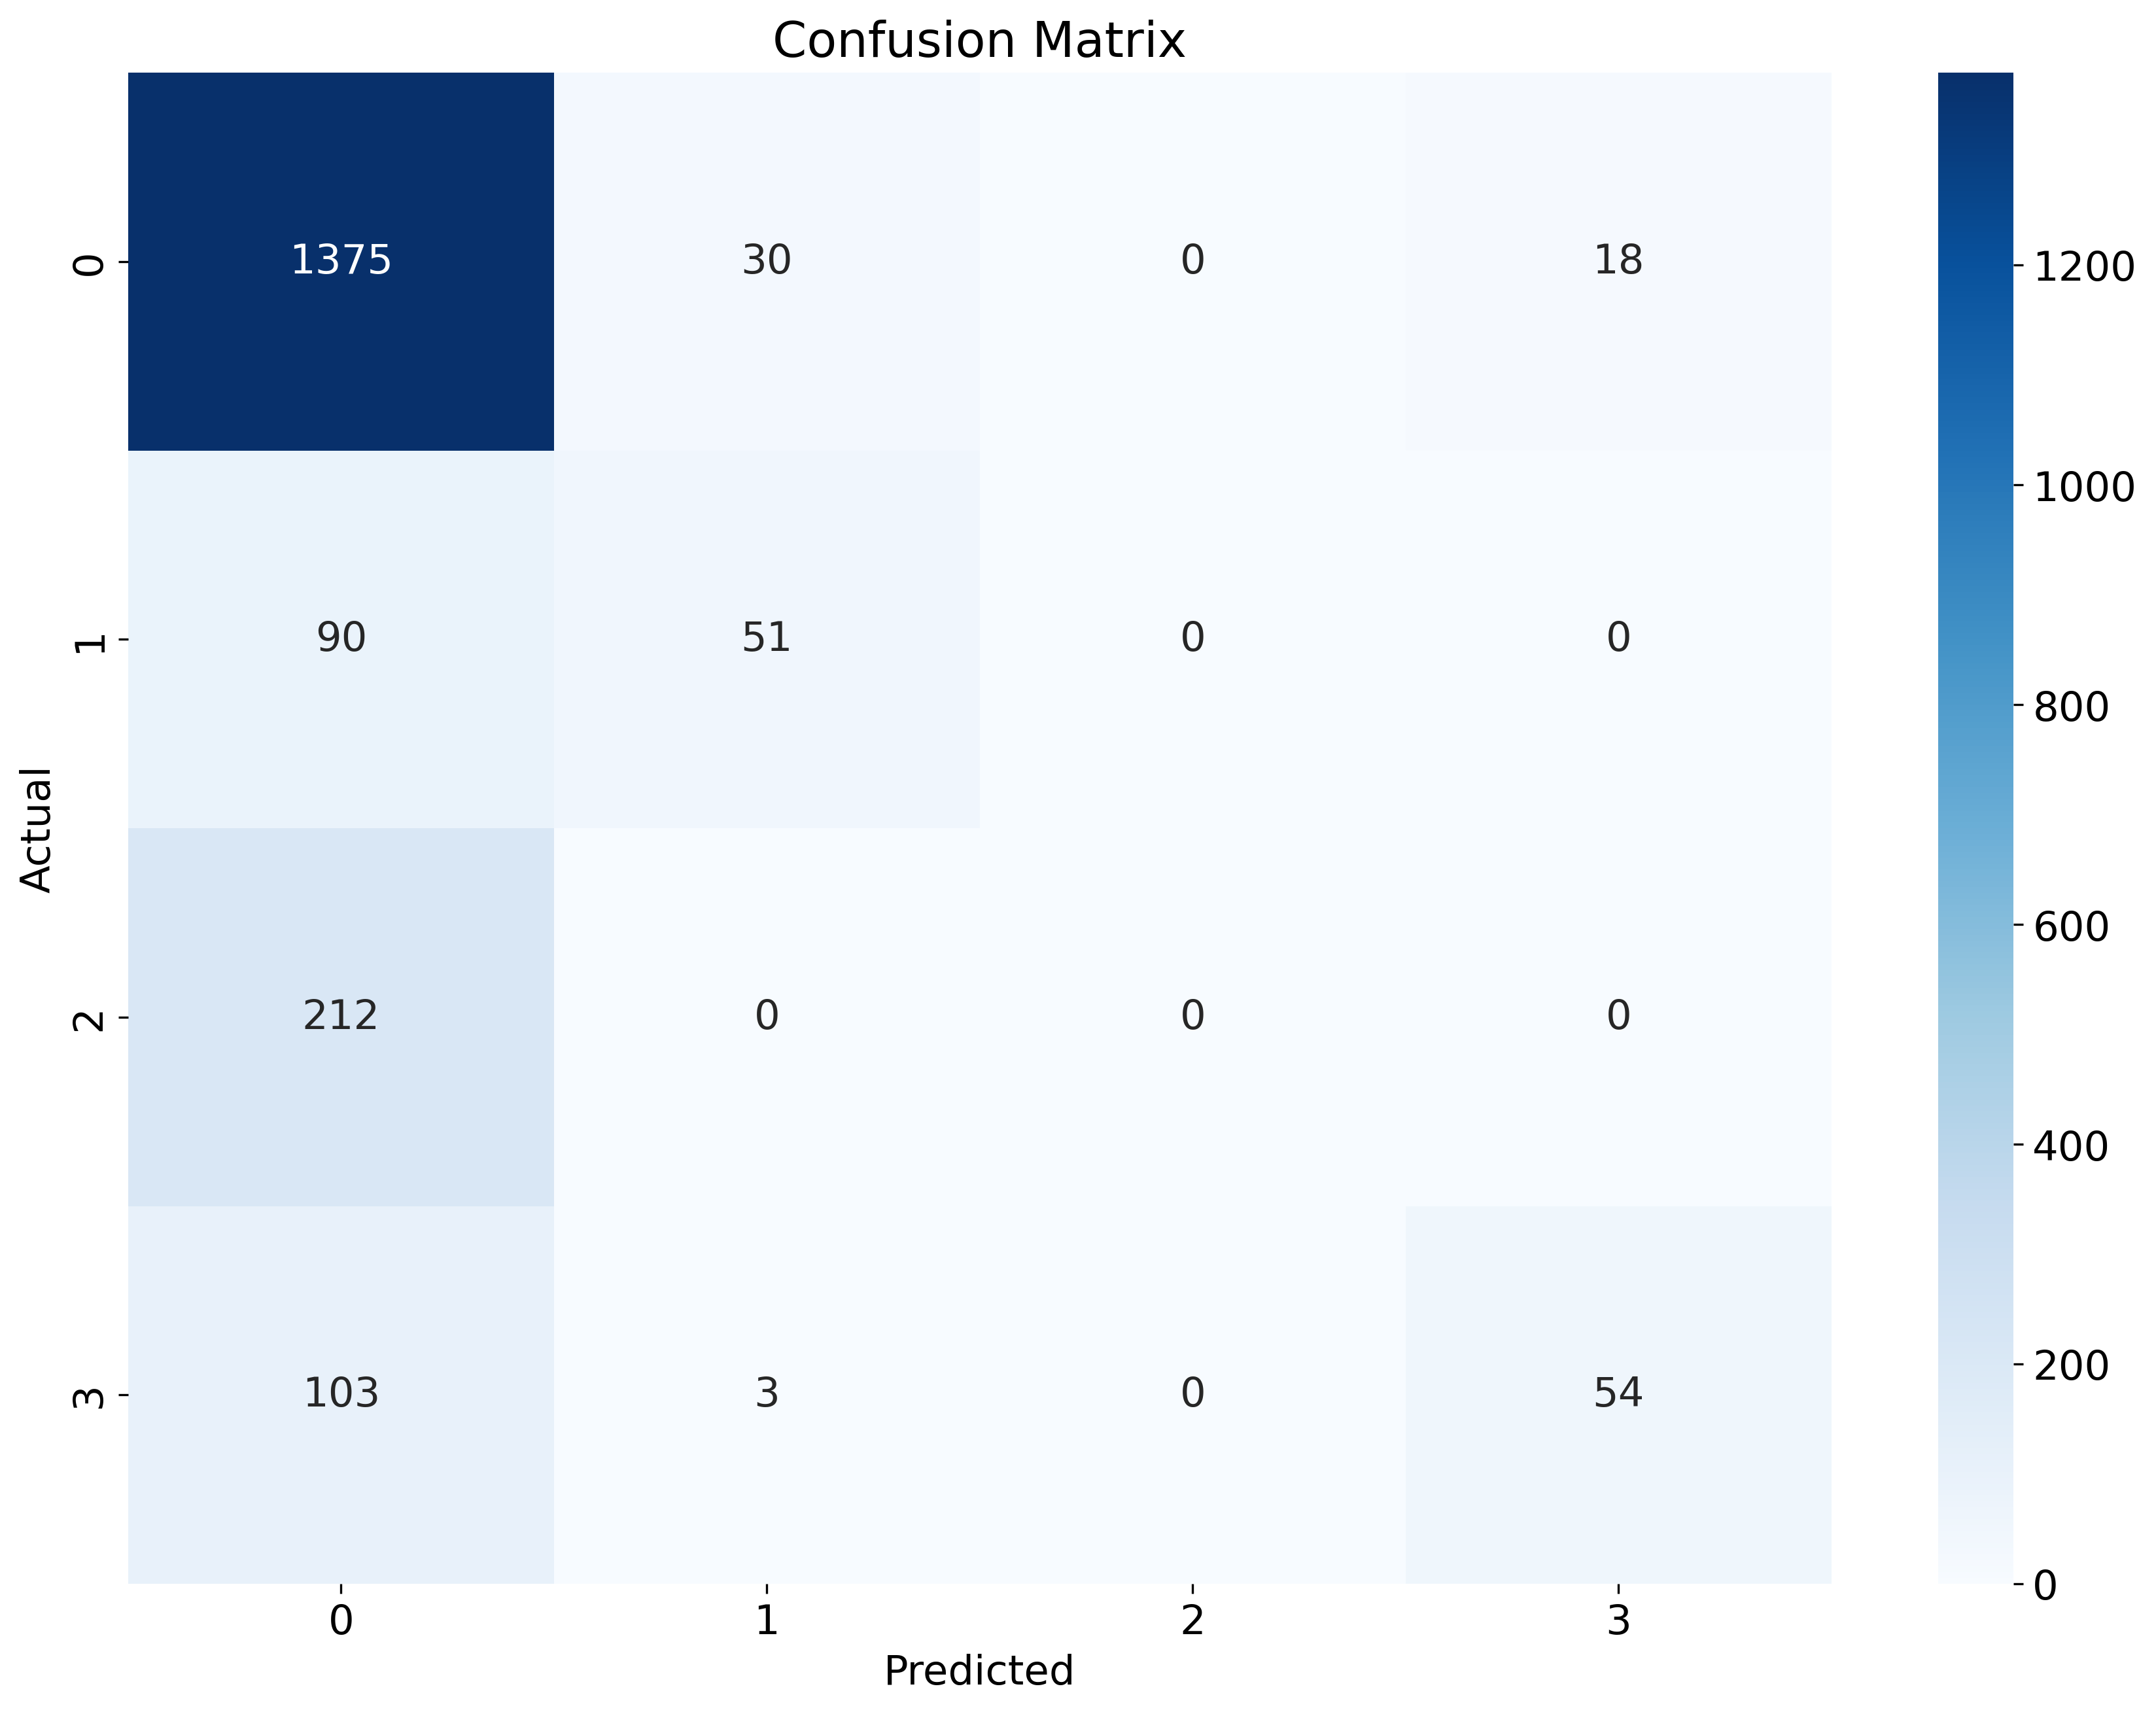

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
print("\n===== Model Evaluation =====")
print(f"Test Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
